# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [1]:
import pandas as pd

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [3]:
colors_df = pd.read_csv('/content/data/colors.csv')
display(colors_df['name'].nunique())

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [5]:
transparent_opaque_counts_groupby = colors_df.groupby('is_trans').size()
display("Method 1 (groupby().size()):")
display(transparent_opaque_counts_groupby)

transparent_opaque_counts_value_counts = colors_df['is_trans'].value_counts()
display("Method 2 (value_counts()):")
display(transparent_opaque_counts_value_counts)

'Method 1 (groupby().size()):'

,0
is_trans,
f,107
t,28


'Method 2 (value_counts()):'

,count
is_trans,
f,107
t,28


**Challenge**: Change this into an h3 section heading: ***Understanding LEGO Themes vs. LEGO Sets***

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: <img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image <img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [6]:
sets_df = pd.read_csv('/content/data/sets.csv')
display(sets_df.head())
display(sets_df.tail())

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [7]:
first_sets = sets_df.sort_values(by='year').head()
display(first_sets[['year', 'name']])

,year,name
9545,1949,Small Doors and Windows Set (ABB)
9521,1949,Extra-Large Gift Set (ABB)
9539,1949,Medium Gift Set (ABB)
9544,1949,Small Brick Set (ABB)
9534,1949,Large Gift Set (ABB)


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [8]:
first_year = sets_df['year'].min()
sets_in_first_year = sets_df[sets_df['year'] == first_year]

num_sets_first_year = sets_in_first_year.shape[0]
num_product_types_first_year = sets_in_first_year['theme_id'].nunique()

display(f"In their first year ({first_year}), LEGO sold {num_sets_first_year} different sets.")
display(f"They offered {num_product_types_first_year} types of LEGO products.")

'In their first year (1949), LEGO sold 5 different sets.'

'They offered 2 types of LEGO products.'

**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [9]:
top_5_sets = sets_df.sort_values(by='num_parts', ascending=False).head()
display(top_5_sets)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [10]:
sets_by_year = sets_df.groupby('year').count()
display(sets_by_year)

# Compare 1955 and 2019
sets_1955 = sets_by_year.loc[1955, 'set_num']
sets_2019 = sets_by_year.loc[2019, 'set_num']

display(f"Number of sets released in 1955: {sets_1955}")
display(f"Number of sets released in 2019: {sets_2019}")

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


'Number of sets released in 1955: 28'

'Number of sets released in 2019: 840'

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

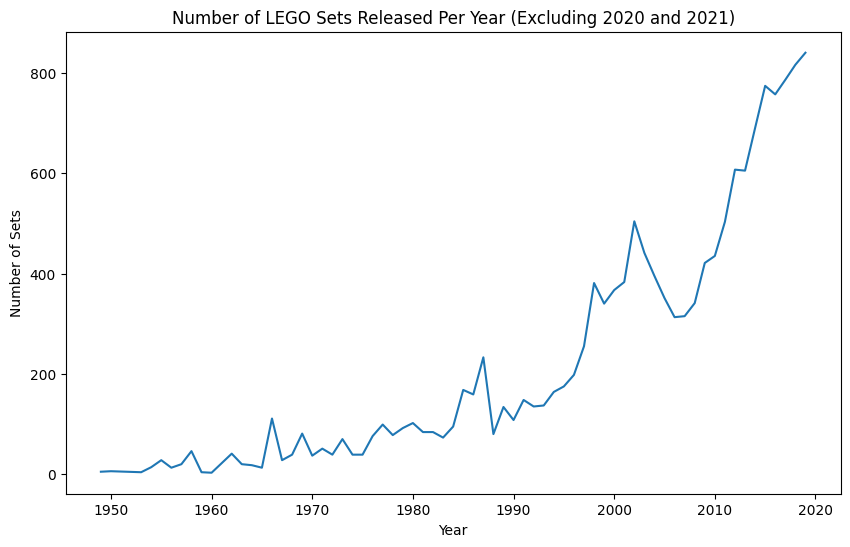

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2])
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.title('Number of LEGO Sets Released Per Year (Excluding 2020 and 2021)')
plt.show()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [12]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns={'theme_id': 'nr_themes'}, inplace=True)
display(themes_by_year.head())
display(themes_by_year.tail())

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

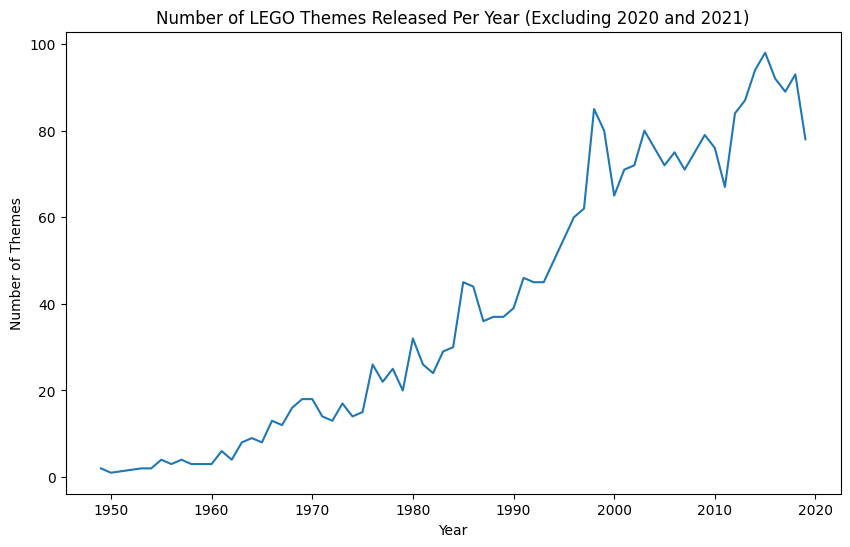

In [13]:
plt.figure(figsize=(10,6))
plt.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2])
plt.xlabel('Year')
plt.ylabel('Number of Themes')
plt.title('Number of LEGO Themes Released Per Year (Excluding 2020 and 2021)')
plt.show()

### Line Charts with Two Seperate Axes

,avg_num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


,avg_num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

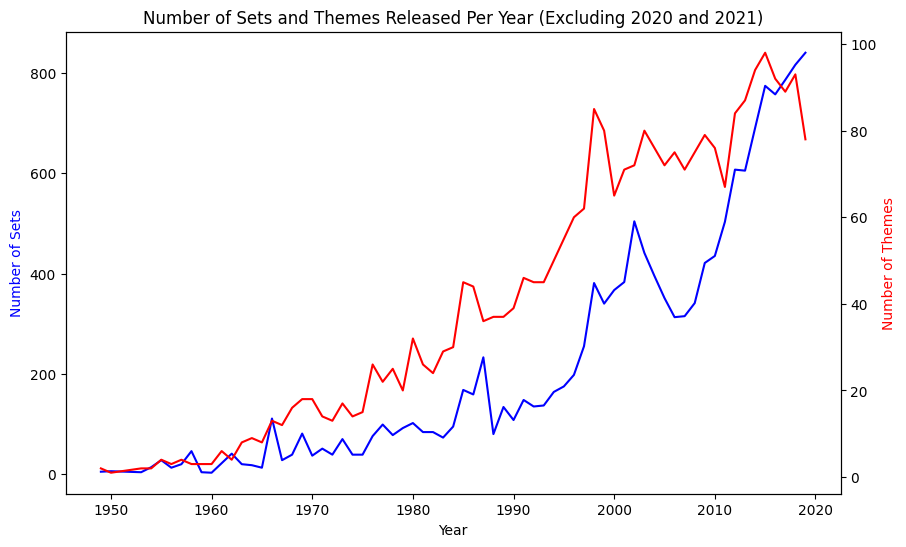

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

# Plot number of sets on the first y-axis
ax1.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='blue')

# Plot number of themes on the second y-axis
ax2.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2], color='red')
ax2.set_ylabel('Number of Themes', color='red')

plt.title('Number of Sets and Themes Released Per Year (Excluding 2020 and 2021)')
plt.show()

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

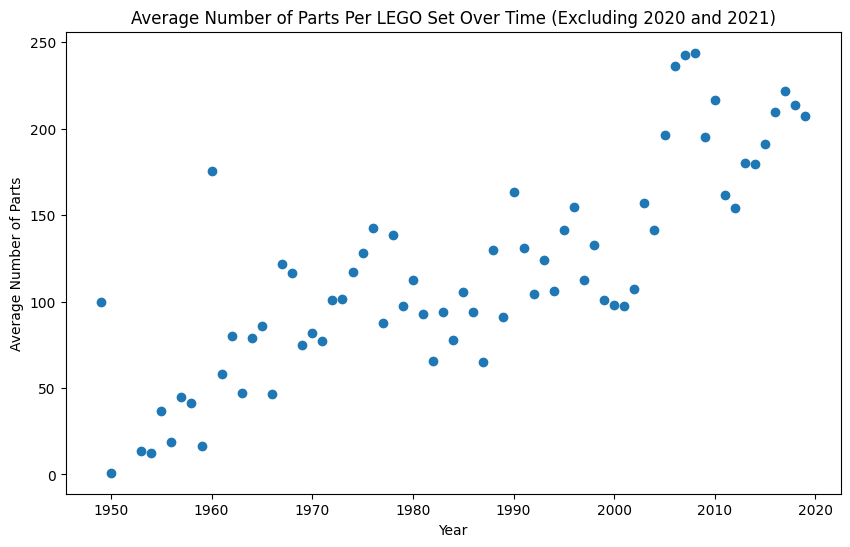

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(parts_by_year.index[:-2], parts_by_year['avg_num_parts'][:-2])
plt.xlabel('Year')
plt.ylabel('Average Number of Parts')
plt.title('Average Number of Parts Per LEGO Set Over Time (Excluding 2020 and 2021)')
plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [18]:
sets_per_theme = sets_df.groupby('theme_id').size().sort_values(ascending=False)
display(sets_per_theme.head())

,0
theme_id,
158,753
501,656
494,398
435,356
503,329


**Challenge** Use what you know about HTML markup and tags to display the database schema: <img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [19]:
themes_df = pd.read_csv('/content/data/themes.csv')
display(themes_df.head())
display(themes_df.tail())

star_wars_themes = themes_df[themes_df['name'] == 'Star Wars']
display("Star Wars Themes:")
display(star_wars_themes)

star_wars_theme_ids = star_wars_themes['id'].tolist()
display(f"Star Wars Theme IDs: {star_wars_theme_ids}")

star_wars_sets = sets_df[sets_df['theme_id'].isin(star_wars_theme_ids)]
display("Star Wars Sets:")
display(star_wars_sets.head())
display(star_wars_sets.tail())

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


,id,name,parent_id
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0
595,709,LEGO Art,NaN


'Star Wars Themes:'

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


'Star Wars Theme IDs: [18, 158, 209, 261]'

'Star Wars Sets:'

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94


,set_num,name,year,theme_id,num_parts
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


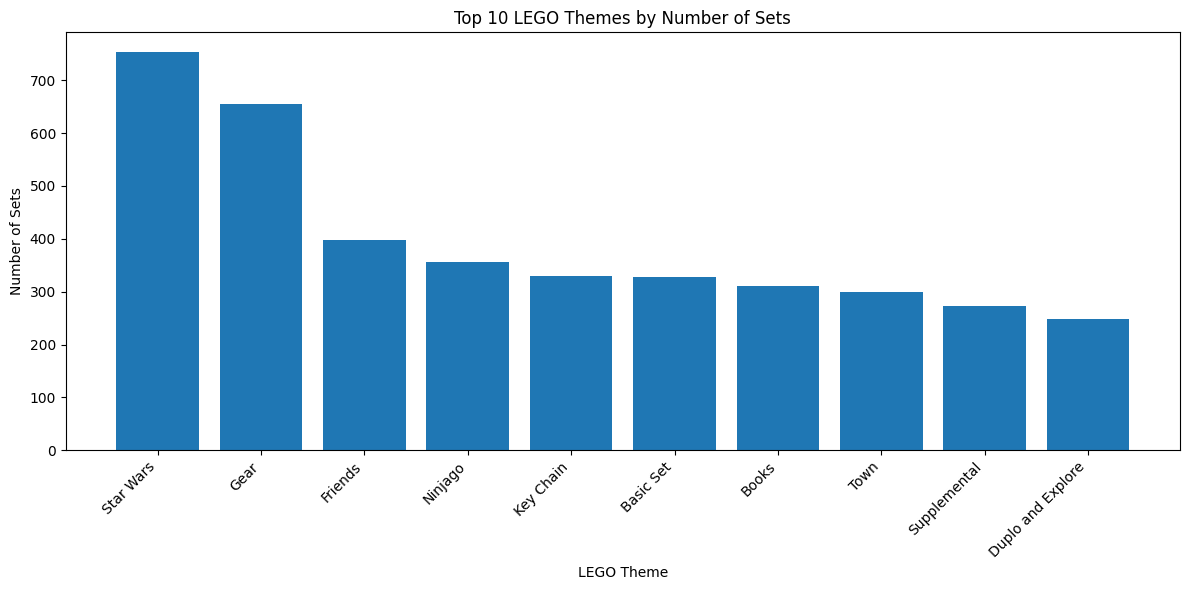

In [22]:
sets_per_theme_df = sets_per_theme.reset_index()
sets_per_theme_df.columns = ['theme_id', 'set_count']

merged_df = pd.merge(sets_per_theme_df, themes_df, left_on='theme_id', right_on='id')

top_10_themes = merged_df.sort_values(by='set_count', ascending=False).head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_10_themes['name'], top_10_themes['set_count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('LEGO Theme')
plt.ylabel('Number of Sets')
plt.title('Top 10 LEGO Themes by Number of Sets')
plt.tight_layout()
plt.show()

### Merging (i.e., Combining) DataFrames based on a Key
